In [71]:
%matplotlib inline

In [72]:
from bb_binary import FrameContainer, Repository, load_frame_container
from datetime import datetime, timedelta
from collections import namedtuple
from collections import Counter
import multiprocessing
import sqlite3
import matplotlib

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from collections import Counter

from pandas import DataFrame, Series
import seaborn as sns

In [73]:
conn = sqlite3.connect('ids.db')

In [74]:
c = conn.cursor()

In [75]:
sql = 'SELECT * FROM IDS'

In [76]:
df = pd.read_sql(sql, conn)

In [77]:
df.tail()

,MONTH,DAY,HOUR,ID,COUNT
5935099,09,19,08,4091,0
5935100,09,19,08,4092,0
5935101,09,19,08,4093,0
5935102,09,19,08,4094,0
5935103,09,19,08,4095,0


In [88]:
df[df.MONTH=='09'].DAY.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19'], dtype=object)

In [79]:
df.MONTH.unique()

array(['07', '08', '09'], dtype=object)

In [80]:
df.DAY.unique()

array(['19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18'], dtype=object)

In [191]:
df.HOUR.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11'], dtype=object)

# Statistik zu einer Stunde

In [107]:
dfh = df.query('(MONTH == "07") & (DAY == "25" ) & (HOUR == "15")')

In [108]:
dfh['frac'] = (100*dfh.COUNT)/(60*60*3)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
dfh.head()

,MONTH,DAY,HOUR,ID,COUNT,frac
602112,07,25,15,0,0,0.000000
602113,07,25,15,1,0,0.000000
602114,07,25,15,2,1,0.009259
602115,07,25,15,3,34,0.314815
602116,07,25,15,4,0,0.000000


In [110]:
dfh.shape

(4096, 6)

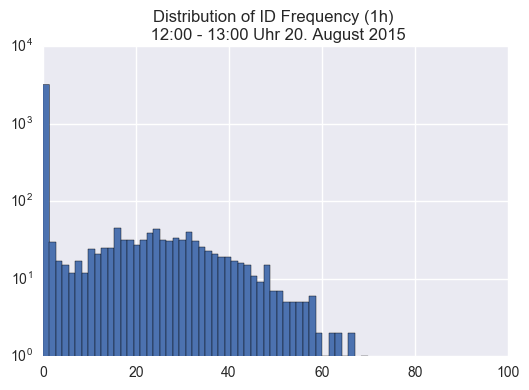

In [111]:
fig, ax = plt.subplots()
dfh.frac.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Distribution of ID Frequency (1h) \n 12:00 - 13:00 Uhr 20. August 2015")


In [112]:
dfh0 = dfh[dfh.COUNT>0]

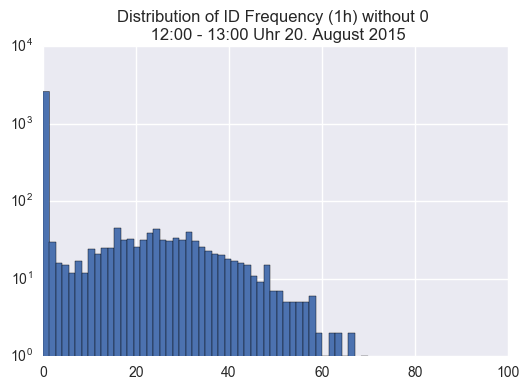

In [113]:
fig, ax = plt.subplots()
dfh0.frac.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Distribution of ID Frequency (1h) without 0 \n 12:00 - 13:00 Uhr 20. August 2015")

In [114]:
dfh0.shape[0]

3497

In [115]:
100*dfh0.shape[0]/(2**12)

85.3759765625

In [116]:
c = Counter(dfh0.COUNT.values)

In [117]:
c.values()

dict_values([465, 10, 1, 1, 17, 1, 2, 2, 1, 217, 1, 1, 1, 1, 334, 40, 53, 1, 1, 1, 1, 1, 2, 134, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 96, 1, 87, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 160, 2, 1, 42, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 30, 1, 1, 105, 1, 1, 2, 1, 1, 1, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 66, 23, 1, 1, 2, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 49, 4, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 7, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 

In [118]:
dfh01 = dfh0[dfh0.COUNT > 15]

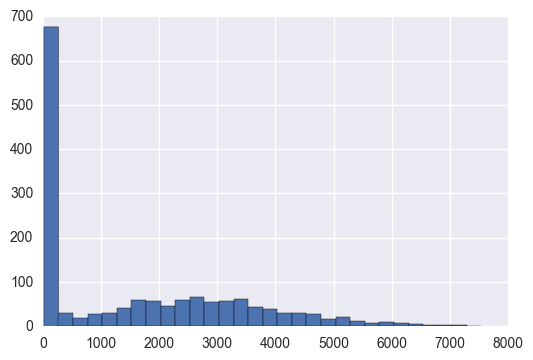

In [119]:
dfh01.COUNT.hist(bins=30)

# Statistik zu einem Tag 30.07.

In [120]:
dfd = df.query('(MONTH == "07") & (DAY == "30" )')

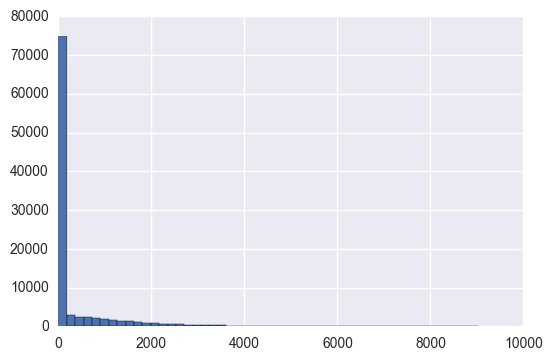

In [121]:
dfd.COUNT.hist(bins=50)

In [122]:
dfd.COUNT.describe()

count    98304.000000
mean       330.187266
std        754.599424
min          0.000000
25%          1.000000
50%          6.000000
75%        130.000000
max       9020.000000
Name: COUNT, dtype: float64

In [123]:
dfd0 = dfd[dfd.COUNT > 0]

In [124]:
dfd0.head()

,MONTH,DAY,HOUR,ID,COUNT
1019905,07,30,00,1,1
1019907,07,30,00,3,2
1019908,07,30,00,4,21
1019909,07,30,00,5,2
1019910,07,30,00,6,382


In [125]:
len(np.unique(list(dfd0.ID)))

4095

In [126]:
grouped = dfd0.groupby(by="ID")

In [127]:
# ID der Königin
for g, gr in grouped:
    if (g == 3258):
        print(gr)
        

        MONTH DAY HOUR    ID  COUNT
1023162    07  30   00  3258      1
1027258    07  30   01  3258     21
1031354    07  30   02  3258      9
1035450    07  30   03  3258      9
1039546    07  30   04  3258      8
1043642    07  30   05  3258      8
1047738    07  30   06  3258      3
1051834    07  30   07  3258     14
1055930    07  30   08  3258      7
1060026    07  30   09  3258     11
1064122    07  30   10  3258      7
1068218    07  30   11  3258     14
1072314    07  30   12  3258     16
1076410    07  30   13  3258     13
1080506    07  30   14  3258     17
1084602    07  30   15  3258     24
1088698    07  30   16  3258      6
1092794    07  30   17  3258     10
1096890    07  30   18  3258    193
1100986    07  30   19  3258      6
1105082    07  30   20  3258      4
1109178    07  30   21  3258      3
1113274    07  30   22  3258     14
1117370    07  30   23  3258      1


In [128]:
day = grouped['COUNT'].agg({'summe' : np.sum, 'meann' : np.mean})

In [129]:
day.head(10)

,summe,meann
ID,,
0,61,3.388889
1,464,19.333333
2,30,2.142857
3,30350,1264.583333
4,128,5.565217
5,112,5.600000
6,12468,623.400000
7,217,9.041667
8,10783,449.291667


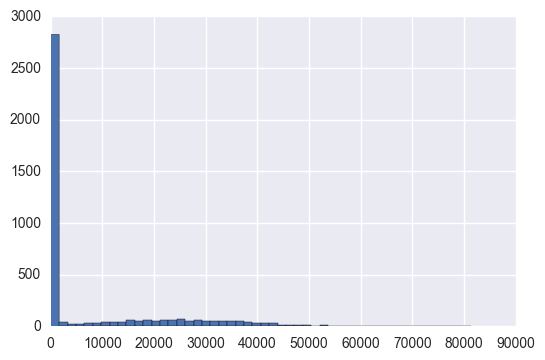

In [130]:
day.summe.hist(bins=50)

In [131]:
day.summe.describe()

count     4095.000000
mean      7926.429548
std      13448.512381
min          1.000000
25%         66.000000
50%        243.000000
75%      13699.000000
max      81287.000000
Name: summe, dtype: float64

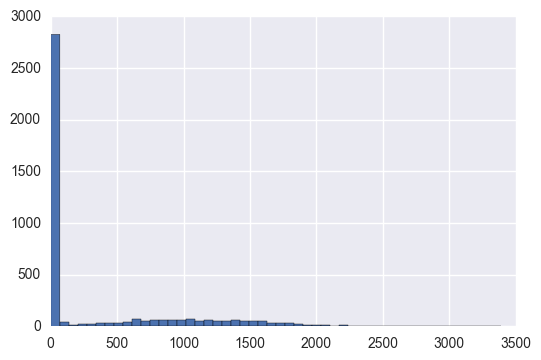

In [132]:
day.meann.hist(bins=50)

In [133]:
ghour = dfd0.groupby(by='HOUR')

In [134]:
data = ghour['ID'].nunique()

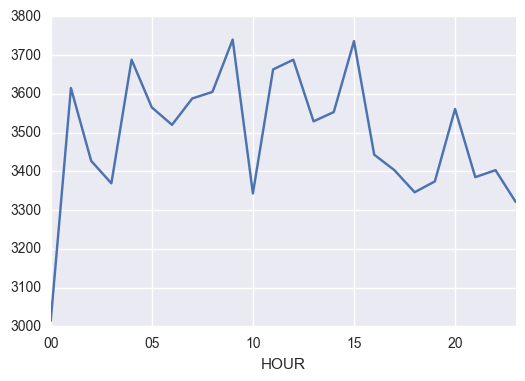

In [135]:
data.plot()

# Statistik zu einem Tag 21.08.

In [136]:
dfd21 = df.query('(MONTH == "08") & (DAY == "21" )')

In [137]:
dfd210 = dfd21[dfd21.COUNT > 0]

In [138]:
len(np.unique(list(dfd210.ID)))

4091

In [139]:
grouped21 = dfd210.groupby(by="ID")

In [140]:
day21 = grouped21['COUNT'].agg({'summe' : np.sum, 'mean' : np.mean})

In [141]:
ghour21 = dfd210.groupby(by='HOUR')

In [142]:
data21 = ghour21['ID'].nunique()

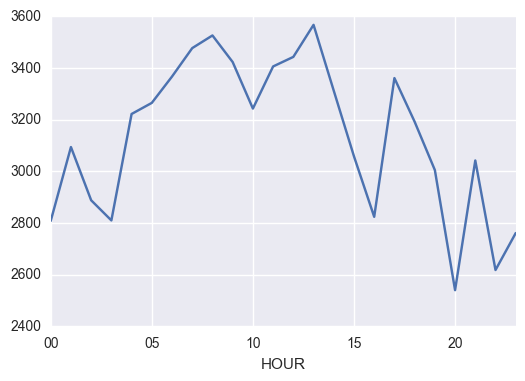

In [143]:
data21.plot()

# Plotten eines beliebigen Tages

In [230]:
def plotDayIDs(df, month, day):
    limit=20
    q = "(MONTH == '{}') & (DAY == '{}')".format(month, day)
    dfd = df.query(q)
    dfd0 = dfd[dfd.COUNT > limit]
    print(len(np.unique(list(dfd0.ID))))
    ghour = dfd0.groupby(by='HOUR')
    data = ghour['ID'].nunique()
    fig, ax = plt.subplots()
    data.plot(ax=ax)
    #ax.set_xlim(0,23)
    ax.set_ylim(0,2**12)
    ax.set_title("{}.{}.2016 (> {})".format(day, month, limit))
    ax.set_xlabel("Hours")
    ax.set_ylabel("Number of bees")

2328


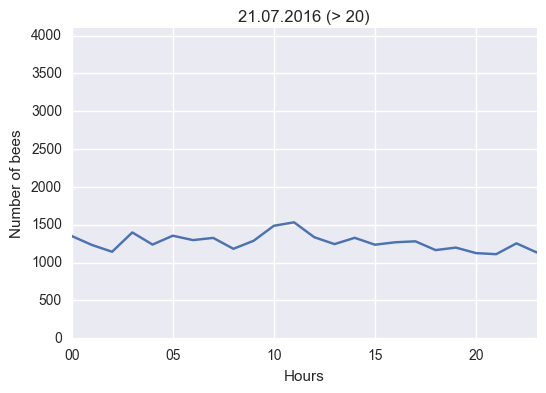

In [231]:
plotDayIDs(df, "07", "21")

3757


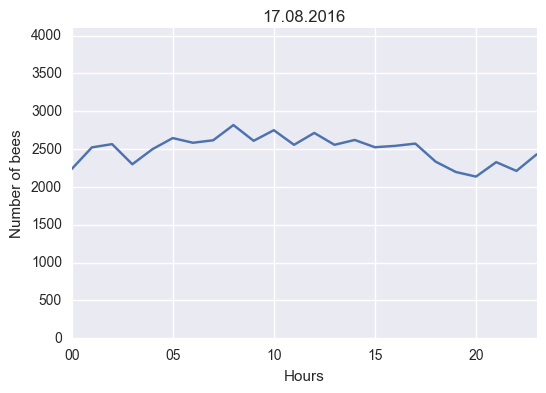

In [226]:
plotDayIDs(df, "08", "17")

785


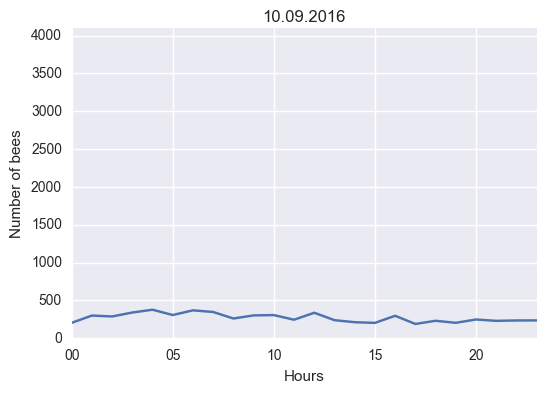

In [227]:
plotDayIDs(df, "09", "10")

In [56]:
# for i in list(range(19,32)):
#     i = str(i).zfill(2)
#     plotDayIDs(df, "08", i)

# Plot über den gesamten Zeitraum

In [218]:
df0 = df[df.COUNT > 5]

In [219]:
grouped = df0.groupby(by=['MONTH', 'DAY'])

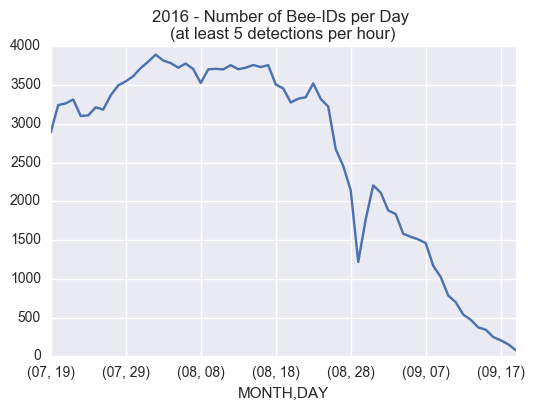

In [221]:
fig, ax = plt.subplots()
grouped.ID.nunique().plot(ax=ax)
ax.set_title("2016 - Number of Bee-IDs per Day \n(at least 5 detections per hour)")

# Plot gesamter Zeitraum jeder Tag

In [223]:
def dataPerDay(df, month, day):
    q = "(MONTH == '{}') & (DAY == '{}')".format(month, day)
    dfd = df.query(q)
    dfd0 = dfd[dfd.COUNT > 20]
    ghour = dfd0.groupby(by='HOUR')
    data = ghour['ID'].nunique()
    return data

In [193]:
data_all = []

for day in list(range(19,32)):
    data_all.append(("07", day, dataPerDay(df, "07", str(day).zfill(2))))

In [194]:
for day in list(range(1,32)):
    data_all.append(("08", day, dataPerDay(df, "08", str(day).zfill(2))))

In [195]:
for day in list(range(1,20)):
    data_all.append(("09", day, dataPerDay(df, "09", str(day).zfill(2))))

In [196]:
#for i in list(range(len(data_all))):
    #print(i, data_all[i][0], data_all[i][1], len(data_all[i][2]))

In [197]:
df_list = []
df_columns = []
for item in data_all:
    df_list.append(item[2])
    df_columns.append("{}.{}.15 ".format(item[1], item[0]))

In [198]:
dd = pd.concat(df_list, axis=1)

In [199]:
dd.columns=df_columns

In [200]:
dd

,19.07.15,20.07.15,21.07.15,22.07.15,23.07.15,24.07.15,25.07.15,26.07.15,27.07.15,28.07.15,...,10.09.15,11.09.15,12.09.15,13.09.15,14.09.15,15.09.15,16.09.15,17.09.15,18.09.15,19.09.15
00,NaN,1134,1352,1107,1149,1129,1054,1042,1370.0,1308,...,123,146,108,98,45,31,25,20,15,10.0
01,NaN,1212,1234,1175,1177,1204,1037,1040,1157.0,1313,...,179,154,111,61,45,34,37,22,12,20.0
02,NaN,1222,1144,1095,966,1160,1073,1045,1259.0,1292,...,169,162,104,88,51,47,39,19,18,22.0
03,NaN,1233,1399,1299,1216,1207,1079,1181,1404.0,1250,...,191,175,97,95,80,56,36,35,30,17.0
04,NaN,1277,1239,1197,1211,1311,1186,1205,1429.0,1224,...,203,157,126,90,81,57,46,47,19,23.0
05,NaN,1230,1356,1213,1265,1361,1237,1223,1518.0,1444,...,159,139,106,87,96,64,50,39,21,18.0
06,NaN,1216,1298,1150,1324,1183,1249,1161,1477.0,1578,...,181,143,109,99,75,62,40,29,23,12.0
07,NaN,1306,1327,1328,1219,1379,1245,1165,1572.0,1502,...,179,144,94,90,80,76,60,38,19,5.0
08,NaN,1339,1183,1178,1197,1294,1096,1186,1434.0,1511,...,151,124,86,88,78,61,39,28,24,5.0
09,NaN,1228,1289,1186,1242,1344,1247,1236,1470.0,1533,...,161,125,100,86,72,57,46,29,23,NaN


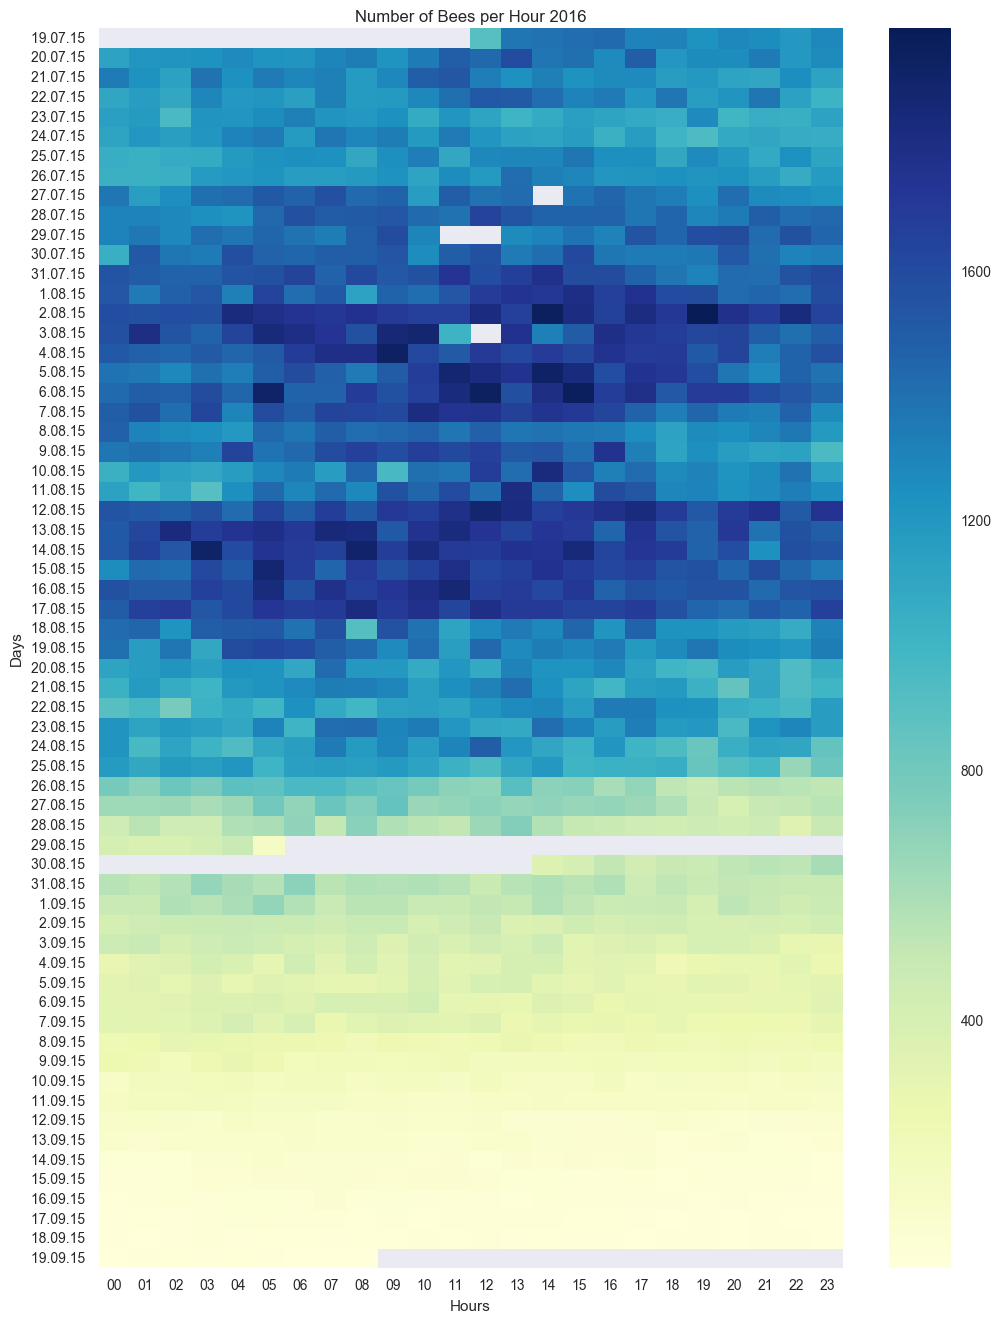

In [201]:
g = sns.heatmap(dd.transpose(), cmap="YlGnBu")
g.figure.set_size_inches(12,16)
g.set_title("Number of Bees per Hour 2016")
g.set_xlabel("Hours")
g.set_ylabel("Days")